In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [404]:
df = pd.read_csv('/content/smartphones.csv')

In [405]:
df.shape

(980, 22)

In [406]:
pd.options.display.max_columns=None

In [407]:
df.head(2)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,NaN,4,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,NaN,4,128,6.1,60,2,ios,12.0,12.0,0,1792,828


In [408]:
# need to remove

# 1-model
# 2-fast_charging available/ battery capacity
# 3-num_cores
# 4- Primary_camera_rear and primary_camera_front



<Axes: >

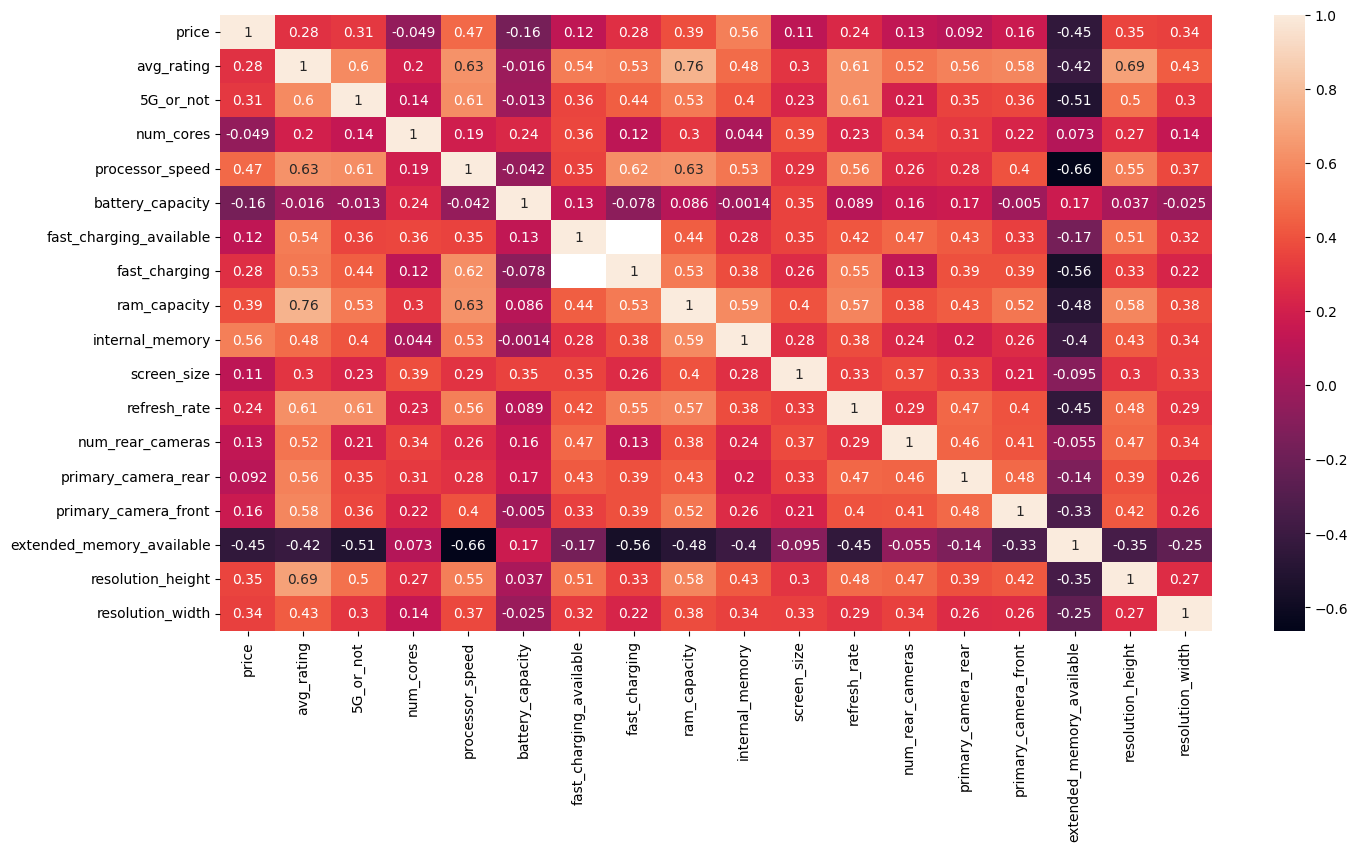

In [409]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),annot =True)

In [410]:
df.isnull().sum().sort_values(ascending=False)

,0
fast_charging,211
avg_rating,101
processor_speed,42
processor_brand,20
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5
brand_name,0
refresh_rate,0


In [411]:
df['fast_charging'].min()

10.0

In [412]:
df['fast_charging'].max()

240.0

In [413]:
df.fast_charging.isnull().sum()

211

In [414]:
df['fast_charging'].value_counts()

,count
fast_charging,
33.0,152
18.0,128
67.0,65
25.0,53
120.0,46
15.0,43
80.0,42
66.0,37
10.0,33


In [415]:
df['fast_charging'].mean()

46.1261378413524

<Axes: xlabel='fast_charging'>

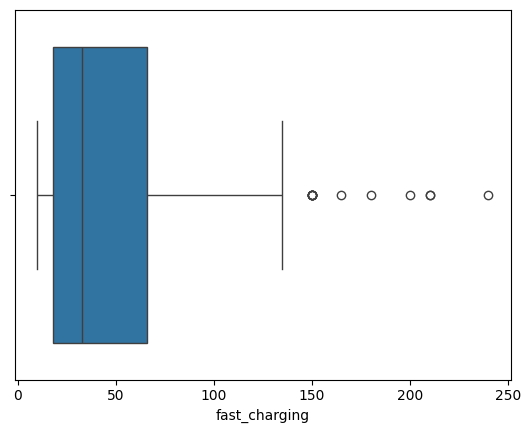

In [416]:
sns.boxplot(data = df,x='fast_charging')

In [417]:
# Fill missing values by the median of fast_charging for each brand wrt their fast_charging average
df['fast_charging'] = df.groupby('brand_name')['fast_charging'].transform(lambda x: x.fillna(x.median()))

In [418]:
df['fast_charging'].value_counts().head()

,count
fast_charging,
33.0,207
18.0,182
25.0,78
67.0,66
44.0,61


In [419]:
df.isnull().sum().sort_values(ascending=False).head(8)

,0
avg_rating,101
processor_speed,42
processor_brand,20
fast_charging,19
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5


In [420]:
df['processor_brand'] = df.groupby('brand_name')['processor_brand'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

<ipython-input-420-ecac70d096d4>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)


In [421]:
df.isnull().sum().sort_values(ascending=False).head(8)

,0
avg_rating,101
processor_speed,42
fast_charging,19
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5
processor_brand,4


In [422]:
df['avg_rating'] = df.groupby('brand_name')['avg_rating'].transform(lambda x: x.fillna(x.median()))

In [423]:
df.isnull().sum().sort_values(ascending=False).head(8)

,0
processor_speed,42
fast_charging,19
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5
processor_brand,4
avg_rating,2


In [424]:
df['processor_speed'].describe()

,processor_speed
count,938.000000
mean,2.427217
std,0.464090
min,1.200000
25%,2.050000
50%,2.300000
75%,2.840000
max,3.220000


In [425]:
df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [426]:
df[['primary_camera_rear','primary_camera_front']]

,primary_camera_rear,primary_camera_front
0,12.0,12.0
1,12.0,12.0
2,12.0,12.0
3,12.0,12.0
4,12.0,12.0
...,...,...
975,48.0,16.0
976,48.0,16.0
977,64.0,32.0
978,50.0,16.0


In [427]:
df['processor_speed'] = df.groupby('brand_name')['processor_speed'].transform(lambda x: x.fillna(x.median()))

In [428]:
df.isnull().sum().sort_values(ascending=False).head(8)

,0
fast_charging,19
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5
processor_brand,4
avg_rating,2
processor_speed,1


In [429]:
df.groupby('brand_name')['fast_charging'].mean().sort_values()

,fast_charging
brand_name,
letv,10.000000
blackview,10.000000
leeco,10.000000
tcl,10.000000
jio,18.000000
itel,18.000000
apple,18.152174
samsung,24.234848
lg,25.000000


In [430]:
# we now remove all the brand in which fast_charging is empty
df = df[~df['brand_name'].isin(['vertu', 'sharp', 'royole', 'micromax', 'lyf', 'ikall', 'leitz', 'duoqin', 'cat','blu'])]


In [431]:
df.shape

(964, 22)

In [432]:
df.isnull().sum().sort_values()

,0
brand_name,0
extended_memory_available,0
primary_camera_rear,0
num_rear_cameras,0
refresh_rate,0
screen_size,0
internal_memory,0
ram_capacity,0
resolution_height,0
resolution_width,0


In [433]:
df['os'] = df.groupby('brand_name')['os'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

<ipython-input-433-68640aaa5f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df.groupby('brand_name')['os'].transform(


In [434]:
df['battery_capacity']=df['battery_capacity'].fillna(df['battery_capacity'].median())

<ipython-input-434-eff367cb1023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['battery_capacity']=df['battery_capacity'].fillna(df['battery_capacity'].median())


In [435]:
df['battery_capacity'].describe()

,battery_capacity
count,964.000000
mean,4833.436722
std,995.496603
min,1821.000000
25%,4500.000000
50%,5000.000000
75%,5000.000000
max,22000.000000


<Axes: xlabel='battery_capacity', ylabel='Density'>

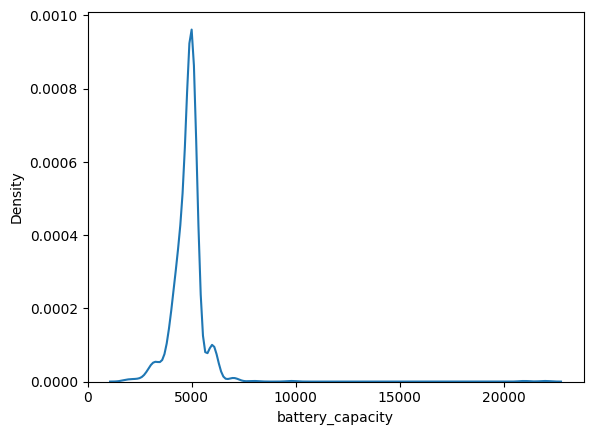

In [436]:
sns.kdeplot(df['battery_capacity'])

<Axes: ylabel='battery_capacity'>

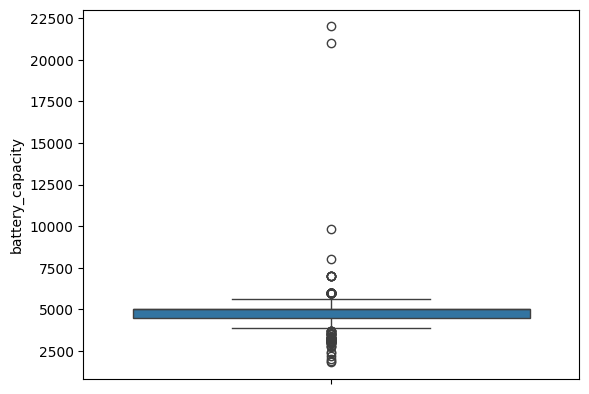

In [437]:
sns.boxplot(df['battery_capacity'])

In [438]:
def remove_outlier(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  iqr =  Q3 - Q1

  low_rang = Q1 -1.5 * iqr
  high_rang = Q3 +1.5 * iqr

  df[col] = df[col].apply(lambda x: high_rang if x > high_rang else x)

  new_df = df[(df[col] <= high_rang)]

  return new_df

In [439]:
df = remove_outlier(df,'battery_capacity')

In [440]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,964.000000,964.000000,964.000000,958.000000,963.000000,964.000000,964.000000,961.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,959.000000,964.000000,964.000000,964.000000
mean,31829.431535,7.817998,0.565353,7.784969,2.445504,4770.884855,0.865145,43.090010,6.578838,141.900415,6.544616,92.604772,2.830913,50.728942,16.676747,0.628631,2221.215768,1077.795643
std,33989.098907,0.723181,0.495968,0.807297,0.460084,566.292325,0.341746,31.757126,2.733396,107.411295,0.313878,28.552995,0.762190,33.017293,10.882164,0.483422,512.636367,289.460692
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,4.500000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,13419.250000,7.475000,0.000000,8.000000,2.150000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,48.000000,8.000000,0.000000,1647.500000,1080.000000
50%,19999.000000,7.900000,1.000000,8.000000,2.360000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35414.000000,8.400000,1.000000,8.000000,2.850000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,480000.000000,8.900000,1.000000,8.000000,3.220000,5750.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,165.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [441]:
df.isnull().sum().sort_values(ascending=False)

,0
num_cores,6
primary_camera_front,5
fast_charging,3
processor_brand,1
processor_speed,1
brand_name,0
screen_size,0
resolution_height,0
extended_memory_available,0
primary_camera_rear,0


In [442]:

# 1-model
# 2-fast_charging available/ battery capacity
# 3-num_cores
# 4- Primary_camera_rear and primary_camera_front

In [443]:
df.drop(columns=['fast_charging_available','num_cores','primary_camera_rear','primary_camera_front'],inplace=True)

In [444]:
df.shape

(964, 18)

<Axes: >

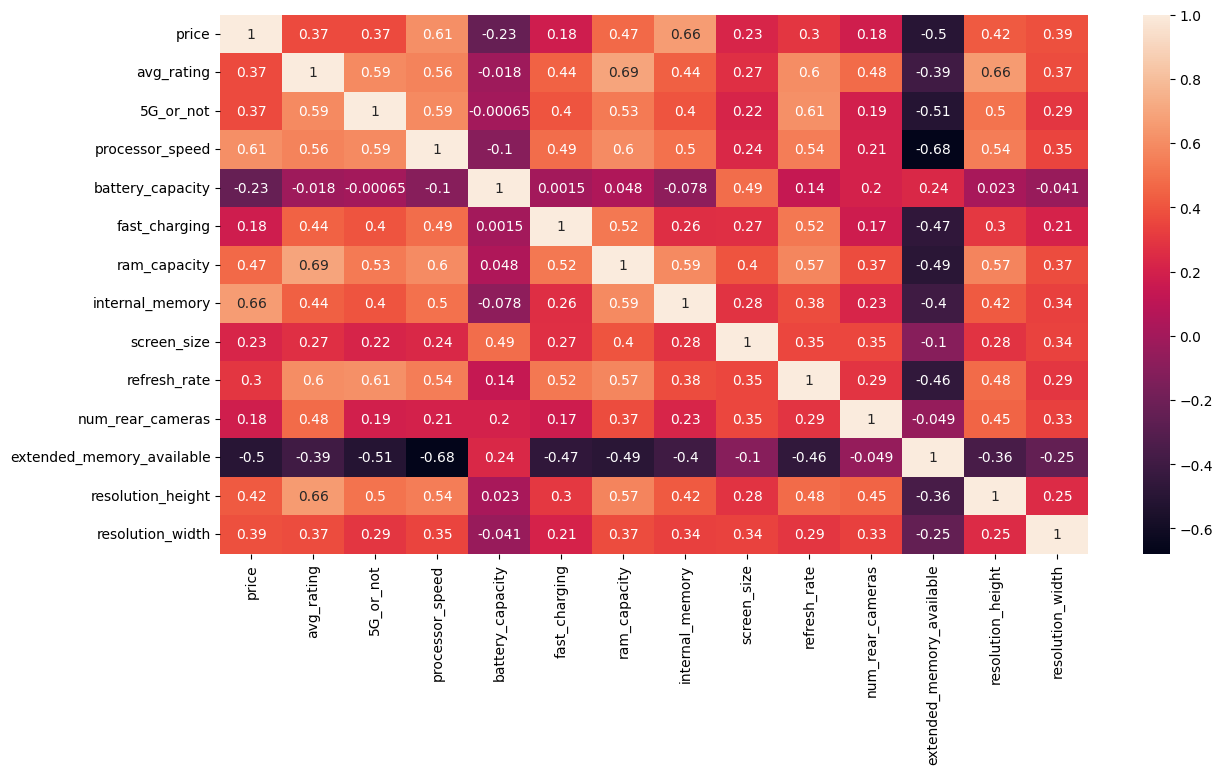

In [445]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [446]:
df.describe()

,price,avg_rating,5G_or_not,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,extended_memory_available,resolution_height,resolution_width
count,964.000000,964.000000,964.000000,963.000000,964.000000,961.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,31829.431535,7.817998,0.565353,2.445504,4770.884855,43.090010,6.578838,141.900415,6.544616,92.604772,2.830913,0.628631,2221.215768,1077.795643
std,33989.098907,0.723181,0.495968,0.460084,566.292325,31.757126,2.733396,107.411295,0.313878,28.552995,0.762190,0.483422,512.636367,289.460692
min,3499.000000,6.000000,0.000000,1.200000,1821.000000,10.000000,1.000000,8.000000,4.500000,60.000000,1.000000,0.000000,480.000000,480.000000
25%,13419.250000,7.475000,0.000000,2.150000,4500.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,0.000000,1647.500000,1080.000000
50%,19999.000000,7.900000,1.000000,2.360000,5000.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,2400.000000,1080.000000
75%,35414.000000,8.400000,1.000000,2.850000,5000.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,2408.000000,1080.000000
max,480000.000000,8.900000,1.000000,3.220000,5750.000000,240.000000,18.000000,1024.000000,8.030000,165.000000,4.000000,1.000000,3840.000000,2460.000000


In [447]:
df = df[df['price']!=480000.000000]

In [448]:
df.shape

(963, 18)

In [449]:
df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'processor_speed', 'battery_capacity',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'refresh_rate', 'num_rear_cameras', 'os', 'extended_memory_available',
       'resolution_height', 'resolution_width'],
      dtype='object')

In [450]:
df['processor_brand'].value_counts()

,count
processor_brand,
snapdragon,406
helio,201
dimensity,176
exynos,61
bionic,45
unisoc,26
tiger,23
google,9
kirin,7


In [451]:
df['processor_speed'].skew()

0.21808516684640847

In [452]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,2.65,3110.0,18.0,4,64,6.1,60,2,ios,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,2.65,3110.0,18.0,4,128,6.1,60,2,ios,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,2.65,3500.0,18.0,4,64,6.5,60,3,ios,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,3.10,5000.0,18.0,4,64,6.1,60,2,ios,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,3.10,5000.0,18.0,4,128,6.1,60,2,ios,0,2532,1170


In [453]:
df['processor_brand'].value_counts()

,count
processor_brand,
snapdragon,406
helio,201
dimensity,176
exynos,61
bionic,45
unisoc,26
tiger,23
google,9
kirin,7


In [454]:
category ={
    'snapdragon':'snapdragon',
    'helio':'helio',
    'dimensity':'dimensity'
}

In [455]:
df['processor_brand'] = df['processor_brand'].map(category).fillna('other')

<Axes: xlabel='processor_brand'>

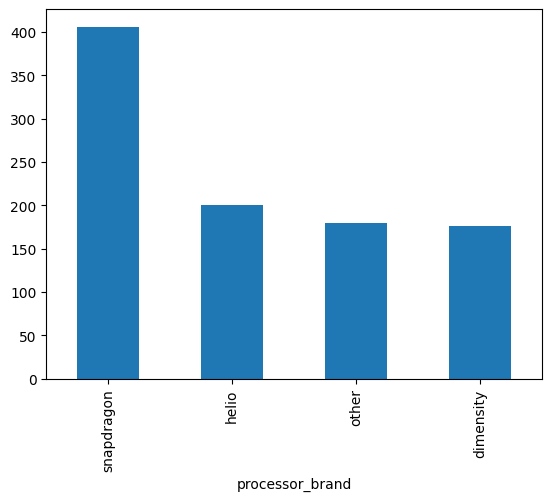

In [456]:
df['processor_brand'].value_counts().plot(kind='bar')

In [457]:
df.shape

(963, 18)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 963 non-null    object 
 1   model                      963 non-null    object 
 2   price                      963 non-null    int64  
 3   avg_rating                 963 non-null    float64
 4   5G_or_not                  963 non-null    int64  
 5   processor_brand            963 non-null    object 
 6   processor_speed            962 non-null    float64
 7   battery_capacity           963 non-null    float64
 8   fast_charging              960 non-null    float64
 9   ram_capacity               963 non-null    int64  
 10  internal_memory            963 non-null    int64  
 11  screen_size                963 non-null    float64
 12  refresh_rate               963 non-null    int64  
 13  num_rear_cameras           963 non-null    int64  
 14 

In [459]:
df[df['fast_charging'].isnull()]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,extended_memory_available,resolution_height,resolution_width
60,gionee,Gionee G13 Pro,6190,6.7,0,other,2.00,3500.0,NaN,4,32,6.26,60,2,other,1,1600,720
61,gionee,Gionee K10,6999,6.7,0,other,2.00,4800.0,NaN,3,32,6.80,60,1,android,1,1600,720
62,gionee,Gionee M12 Pro,7499,6.7,0,helio,1.99,4000.0,NaN,6,128,6.20,60,1,android,1,1520,720


In [460]:
df[df.duplicated()]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,extended_memory_available,resolution_height,resolution_width


In [461]:
df['fast_charging'].fillna(df['fast_charging'].mean(),inplace=True)

<ipython-input-461-f00c3cc08429>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fast_charging'].fillna(df['fast_charging'].mean(),inplace=True)


In [462]:
df['processor_speed'].fillna(df['processor_speed'].mean(),inplace=True)

<ipython-input-462-7917cd0bf2dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processor_speed'].fillna(df['processor_speed'].mean(),inplace=True)


In [463]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,0
5G_or_not,0
processor_brand,0
processor_speed,0
battery_capacity,0
fast_charging,0
ram_capacity,0


In [464]:
# now we remove some columns

df.drop(columns=['model'],inplace=True)

# Temporary removing

In [465]:
# pixel per inch(ppi)

df['PPI']= round(((df['resolution_width']**2) + (df['resolution_height']**2))**0.5/df['screen_size'],2)

In [466]:
# remvoing

df.drop(columns=['screen_size','resolution_height','resolution_width','refresh_rate','PPI'],axis=1,inplace=True)

In [467]:
df.sample()

,brand_name,price,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
46,asus,39999,8.7,1,snapdragon,2.9,5750.0,65.0,8,128,3,android,0


<Axes: xlabel='price', ylabel='Density'>

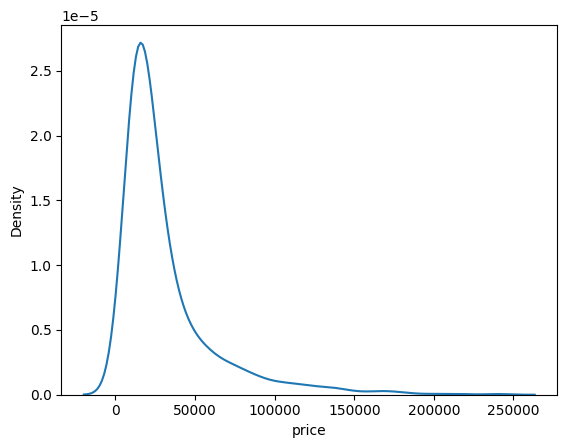

In [468]:
# WITH OUT APPLYING TRANSFORMATION

sns.kdeplot(df['price'])

<Axes: xlabel='price', ylabel='Density'>

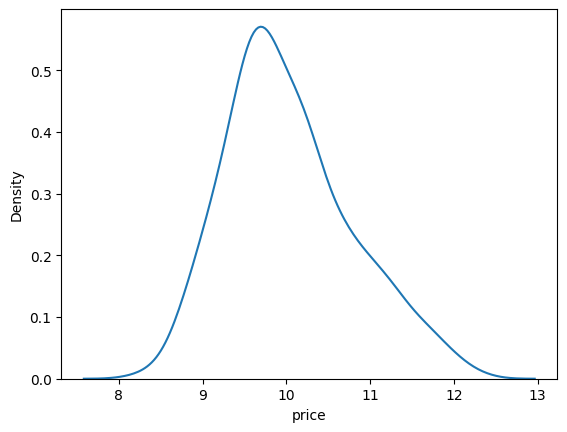

In [469]:
# WITH TRANSFORMATION

sns.kdeplot(np.log(df['price']))

In [470]:
df.head()

,brand_name,price,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
0,apple,38999,7.3,0,other,2.65,3110.0,18.0,4,64,2,ios,0
1,apple,46999,7.5,0,other,2.65,3110.0,18.0,4,128,2,ios,0
2,apple,109900,7.7,0,other,2.65,3500.0,18.0,4,64,3,ios,0
3,apple,51999,7.4,1,other,3.10,5000.0,18.0,4,64,2,ios,0
4,apple,55999,7.5,1,other,3.10,5000.0,18.0,4,128,2,ios,0


### Converting fast Charging numerical column to categorical columns

In [471]:
df['fast_charging'].describe()

,fast_charging
count,963.000000
mean,43.106771
std,31.719851
min,10.000000
25%,18.000000
50%,33.000000
75%,65.000000
max,240.000000


In [472]:
df = remove_outlier(df,'fast_charging')

In [473]:
df['fast_charging'].describe()

,fast_charging
count,963.000000
mean,42.594310
std,29.654403
min,10.000000
25%,18.000000
50%,33.000000
75%,65.000000
max,135.500000


In [474]:
df['fast_charging']=df['fast_charging'].apply(lambda x:'Low' if x <=30 else ('Medium' if x <=70 else 'High' ))

In [475]:
df['fast_charging'].value_counts()

,count
fast_charging,
Medium,447
Low,398
High,118


## Up till here fast_Charging Column

> Add blockquote



### Depandant and Indepandent Columns

In [476]:
# X = df.drop('price',axis=1)
# y = (df['price'])

X = df.drop(['price'],axis=1)
y = np.log(df['price'])

In [477]:
X

,brand_name,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
0,apple,7.3,0,other,2.65,3110.0,Low,4,64,2,ios,0
1,apple,7.5,0,other,2.65,3110.0,Low,4,128,2,ios,0
2,apple,7.7,0,other,2.65,3500.0,Low,4,64,3,ios,0
3,apple,7.4,1,other,3.10,5000.0,Low,4,64,2,ios,0
4,apple,7.5,1,other,3.10,5000.0,Low,4,128,2,ios,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,7.5,0,snapdragon,2.30,5020.0,Low,4,64,4,android,1
976,xiaomi,7.7,0,snapdragon,2.30,5020.0,Low,4,128,4,android,1
977,xiaomi,8.0,0,snapdragon,2.30,5020.0,Medium,6,64,4,android,1
978,zte,8.2,1,snapdragon,3.20,4200.0,Medium,6,128,4,android,1


In [478]:
y

,price
0,10.571291
1,10.757882
2,11.607326
3,10.858980
4,10.933089
...,...
975,9.546741
976,9.577688
977,9.710509
978,9.903438


In [479]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [480]:
from sklearn.linear_model import LinearRegression


In [481]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.12,random_state=42)

In [482]:
X_train.head()

,brand_name,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
973,xiaomi,7.8,0,helio,2.05,4500.0,Low,6,64,4,android,1
801,vivo,6.8,0,helio,2.00,5000.0,Medium,3,64,3,android,1
922,xiaomi,7.6,0,snapdragon,2.30,5020.0,Low,4,64,4,android,1
326,oppo,6.5,0,helio,2.00,4230.0,Medium,3,32,1,android,1
652,samsung,7.9,1,snapdragon,3.20,4500.0,Medium,12,256,3,android,1


In [483]:
y_train.head()

,price
973,9.740910
801,9.305651
922,9.210240
326,9.104869
652,11.561706


In [484]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [485]:
# 145789 12

In [493]:
print("**"*30)

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,3,6,10])
# ],remainder='passthrough')

step1 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), [0, 3, 6, 10]),  # OneHotEncoding on specific columns
    ('scaler', StandardScaler(), [1, 4, 5, 7, 8, 9])  # StandardScaler on specified numeric columns
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('MAE :',mean_absolute_error(y_test,y_pred))
print('R2_score :',r2_score(y_test,y_pred))


print("**"*30)

************************************************************
MAE : 0.22600223642477693
R2_score : 0.8614674266738247
************************************************************


In [494]:
X_test.tail(5)

,brand_name,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
358,oppo,7.80,0,snapdragon,2.00,5000.0,Medium,6,128,3,android,1
781,vivo,7.90,1,snapdragon,3.20,4800.0,Medium,12,256,3,android,0
490,realme,7.85,0,helio,2.10,4000.0,Medium,2,16,2,android,1
369,oppo,8.05,1,snapdragon,2.84,4500.0,Medium,8,256,3,android,0
607,samsung,8.60,1,snapdragon,2.96,4500.0,Low,6,128,3,android,1


In [495]:
X_test[X_test['battery_capacity']==4800.0]

,brand_name,avg_rating,5G_or_not,processor_brand,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,num_rear_cameras,os,extended_memory_available
298,oneplus,8.6,1,snapdragon,3.2,4800.0,High,12,256,3,android,0
79,honor,8.8,1,snapdragon,2.5,4800.0,Medium,12,512,3,android,0
781,vivo,7.9,1,snapdragon,3.2,4800.0,Medium,12,256,3,android,0


In [496]:
X_test.dtypes

,0
brand_name,object
avg_rating,float64
5G_or_not,int64
processor_brand,object
processor_speed,float64
battery_capacity,float64
fast_charging,object
ram_capacity,int64
internal_memory,int64
num_rear_cameras,int64


In [497]:
# ['vivo',7.9,	1,	'snapdragon',	3.2,	4800.0,	'Medium',	12,	256,	3,	'android',	0]
# [['oppo',	8.05,	1,	'snapdragon',2.84,	4500.0,	'Medium',	8,	256,	3,	'android',	0]]

In [498]:
np.exp(y_test.tail(5))

,price
358,14990.0
781,119990.0
490,8999.0
369,92249.0
607,39990.0


In [499]:
np.exp(	9.073375)

8720.00421260664

In [500]:
# <----EXPERIMENT ON A SINGLE RESULT---->
# ---------------------------------------------

# before applying transformatiion on a single column price

# the result is = array([4755.36209832])


# After applying transformation on a single column price

# the result is = 7746.998833054739


# the actual price is = 8720

np.exp(pipe.predict(X_test.head(1)))

array([7738.30960035])

In [501]:
np.exp(8.94506408)

7669.9400640829945

In [502]:
# before converting fast_charging column into categorical

np.exp(8.955113)

7747.40323694868

# Other Algorithms

In [503]:
# RandomForestRegressor

print("**"*30)

from sklearn.ensemble import RandomForestRegressor



step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),  # Preprocessing step remains the same
    ('step2', step2)   # New algorithm here
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2_score :', r2_score(y_test, y_pred))

print("**"*30)

************************************************************
MAE : 0.19440808514882524
R2_score : 0.9048658874046712
************************************************************


In [504]:
np.exp(pipe.predict(X_test.head(1)))

array([9107.55116049])

# -------------------------------------------------------------------------

- I am using this Algorithm for Smartphones price pridiction in this Project

In [506]:
import pickle
pickle.dump(df,open('smartphone_df.pkl','wb'))
pickle.dump(pipe,open('smartphone_pipe.pkl','wb'))

# -----------------------------------------------------------------------------

In [395]:
# Decision Tree
print("**"*30)

from sklearn.tree import DecisionTreeRegressor
step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1', step1),  # Preprocessing step remains the same
    ('step2', step2)   # New algorithm here
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2_score :', r2_score(y_test, y_pred))


print("**"*30)

************************************************************
MAE : 0.2678273999798122
R2_score : 0.7763169579552849
************************************************************


In [396]:
np.exp(pipe.predict(X_test.head(1)))

array([9245.62063898])

In [397]:
# Gradient Boosting


from sklearn.ensemble import GradientBoostingRegressor
step2 = GradientBoostingRegressor()
print("**"*30)
pipe = Pipeline([
    ('step1', step1),  # Preprocessing step remains the same
    ('step2', step2)   # New algorithm here
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2_score :', r2_score(y_test, y_pred))

print("**"*30)

************************************************************
MAE : 0.17700108630419353
R2_score : 0.9166641908535431
************************************************************


In [398]:
np.exp(pipe.predict(X_test.head(1)))

array([8940.21517804])

In [399]:
# SVM
print("**"*30)

from sklearn.svm import SVR
step2 = SVR()

pipe = Pipeline([
    ('step1', step1),  # Preprocessing step remains the same
    ('step2', step2)   # New algorithm here
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2_score :', r2_score(y_test, y_pred))


print("**"*30)

************************************************************
MAE : 0.16942071044066265
R2_score : 0.9164952876799938
************************************************************


In [400]:
np.exp(pipe.predict(X_test.head(1)))

array([7802.7878255])

In [401]:
# knn

print("**"*30)

from sklearn.neighbors import KNeighborsRegressor
step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1', step1),  # Preprocessing step remains the same
    ('step2', step2)   # New algorithm here
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2_score :', r2_score(y_test, y_pred))


print("**"*30)

************************************************************
MAE : 0.19364634436466327
R2_score : 0.890674758166655
************************************************************


In [402]:
np.exp(pipe.predict(X_test.head(1)))

array([7941.47881903])